In [100]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly as plt

from datetime import datetime
from datetime import timedelta
import plotly.express as px

In [102]:
partners = pd.read_csv('./drive/MyDrive/cmf/partners_delays.csv')
orders = pd.read_csv('./drive/MyDrive/cmf/orders.csv')
#orders = pd.read_csv(r"C:\Users\HP\Desktop\цмф\Данные\orders.csv")
#partners = pd.read_csv(r"C:\Users\HP\Desktop\цмф\Данные\partners_delays.csv")

In [103]:
#для формирования единого df из двух файлов
def merging(partners, orders):
  #переименуем столбец для мерджа
  orders = orders.rename(columns={"date": "dttm"})
  #объеденим датасеты
  result = pd.merge(partners, orders, how="outer", on=["delivery_area_id", "dttm"])
  #поменяем форматы данных, заменим NaN на 0
  result['orders_cnt'] = result['orders_cnt'].fillna(0)
  result['partners_cnt'] = result['partners_cnt'].astype(int)
  result['orders_cnt'] = result['orders_cnt'].astype(int)
  #вытащим отдельно дату и время
  result[['date', 'time']] = result['dttm'].str.split(' ', expand=True)
  return(result)

#посчитаем количество дней работы сервиса в каждой зоне
def add_days_count(df):
  df1 = df[['delivery_area_id', 'date']].drop_duplicates().reset_index().drop(columns=['index']).drop_duplicates()
  df1['num_days_of_service'] = df1.groupby('delivery_area_id')['date'].transform('count').to_frame()
  df1 = df1[['delivery_area_id', 'num_days_of_service']].drop_duplicates()
  df = pd.merge(df, df1, how="left", on=["delivery_area_id"])
  df['num_days_of_service'] = df['num_days_of_service'].astype(int)
  return(df)

result = merging(partners, orders)
#result = add_days_count(result)
result.head()

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00


In [104]:
result.info

<bound method DataFrame.info of          delivery_area_id                 dttm  partners_cnt  delay_rate  \
0                       0  2021-04-01 09:00:00             3    0.000000   
1                       0  2021-04-01 10:00:00             4    0.111111   
2                       0  2021-04-01 11:00:00             4    0.000000   
3                       0  2021-04-01 12:00:00             4    0.000000   
4                       0  2021-04-01 13:00:00             1    0.000000   
...                   ...                  ...           ...         ...   
1247466               592  2021-11-30 17:00:00             2    0.000000   
1247467               592  2021-11-30 18:00:00             2    0.000000   
1247468               592  2021-11-30 19:00:00             2    0.000000   
1247469               592  2021-11-30 20:00:00             2    0.000000   
1247470               592  2021-11-30 21:00:00             1    0.000000   

         orders_cnt        date      time  
0          

In [105]:
result.info

<bound method DataFrame.info of          delivery_area_id                 dttm  partners_cnt  delay_rate  \
0                       0  2021-04-01 09:00:00             3    0.000000   
1                       0  2021-04-01 10:00:00             4    0.111111   
2                       0  2021-04-01 11:00:00             4    0.000000   
3                       0  2021-04-01 12:00:00             4    0.000000   
4                       0  2021-04-01 13:00:00             1    0.000000   
...                   ...                  ...           ...         ...   
1247466               592  2021-11-30 17:00:00             2    0.000000   
1247467               592  2021-11-30 18:00:00             2    0.000000   
1247468               592  2021-11-30 19:00:00             2    0.000000   
1247469               592  2021-11-30 20:00:00             2    0.000000   
1247470               592  2021-11-30 21:00:00             1    0.000000   

         orders_cnt        date      time  
0          

In [106]:
pd.DataFrame(result)

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00
...,...,...,...,...,...,...,...
1247466,592,2021-11-30 17:00:00,2,0.000000,3,2021-11-30,17:00:00
1247467,592,2021-11-30 18:00:00,2,0.000000,2,2021-11-30,18:00:00
1247468,592,2021-11-30 19:00:00,2,0.000000,4,2021-11-30,19:00:00
1247469,592,2021-11-30 20:00:00,2,0.000000,4,2021-11-30,20:00:00


In [107]:
def day_of_week_new(result):
    result['year'], result['month'], result['day'] = result['date'].str.split('-', 2).str
    result['month'] = pd.to_numeric(result['month'])
    result['year'] = pd.to_numeric(result['year'])
    result['day'] = pd.to_numeric(result['day'])
    result['month'] = result['month'].replace([10, [2,3,11], [12, 9], [4, 7], 5, 8, 6], [1, 4, 6, 0, 2, 3, 5])
    result['day_of_week'] = (result['day'] + result['month'] + (6+result['year']+result['year']//4)%7)%7
    result['day_of_week'] = result['day_of_week'].replace([0, 1, 2, 3, 4, 5, 6], [5, 6, 7, 1, 2, 3, 4])
    return(result)
day_of_week_new(result).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [108]:
result = day_of_week_new(result)
result.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [109]:
result


,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
1247466,592,2021-11-30 17:00:00,2,0.000000,3,2021-11-30,17:00:00,2021,4,30,2
1247467,592,2021-11-30 18:00:00,2,0.000000,2,2021-11-30,18:00:00,2021,4,30,2
1247468,592,2021-11-30 19:00:00,2,0.000000,4,2021-11-30,19:00:00,2021,4,30,2
1247469,592,2021-11-30 20:00:00,2,0.000000,4,2021-11-30,20:00:00,2021,4,30,2


In [110]:
#result.sort_values(by='dttm', inplace=True)
#def oh(arr, day):
   #results = result.loc[result['delivery_area_id'].isin(arr)]
   #resultss = results[['orders_cnt', 'dttm','day_of_week']].groupby(['dttm']).sum()
   #resultsss = resultss.loc[resultss['day_of_week'] == day]
   #return resultsss
#resulted['dttm'] = pd.to_datetime(resulted['dttm'])
#def aboba(area, day):
 # result1 = result.loc[result['delivery_area_id'] == area]
 # result2 = result1.groupby(['dttm']).sum()
 # result3 = result2.loc[result2['day_of_week'] == day]
 # return result3
   

In [111]:

#import matplotlib.pyplot as plt
#import statsmodels.graphics.tsaplots as sgt
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

#fig, axes = plt.subplots(3, 2, sharex=True)
#axes[0, 0].plot(resulted.orders_cnt); axes[0, 0].set_title('Original Series')
#sgt.plot_acf(resulted.orders_cnt, ax=axes[0, 1])

# 1st Differencing
#axes[1, 0].plot(resulted.orders_cnt.diff()); axes[1, 0].set_title('1st Order Differencing')
#sgt.plot_acf(resulted.orders_cnt.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
#axes[2, 0].plot(resulted.orders_cnt.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#sgt.plot_acf(resulted.orders_cnt.diff().diff().dropna(), ax=axes[2, 1])


#plt.show()

In [112]:
#всего городов = 593
#уникальных дней = 244
#минимальная дата = 2021-04-01 но она разная у всех городов
#макс дата = 2021-11-30 у всех зон

In [113]:
#надо выбрать, например, 3-4 (num_of_cities) крупных города(просто возьмите по наибольшему числу заказов последней даты обуч выборки) 
#и вывести для них массив с днями (num_of_peaks), у которых наибольшая дельта с предшествующими(в процентаже сначала, затем отдельная реализация с абсолютными значениями)

#выбираем количество городов, для которых вывести максимальные отклонения заказов на последнюю дату
def df_with_most_cnt_orders_in_last_day(df, num_of_cities=5):
  cities = df[['delivery_area_id', 'orders_cnt']].loc[df['date']=='2021-11-30']
  cities['sum_of_orders_in_last_date'] = cities.groupby(['delivery_area_id'])['orders_cnt'].transform('sum')
  cities = cities.drop(columns=['orders_cnt']).drop_duplicates().sort_values(by=['sum_of_orders_in_last_date'], ascending=False).reset_index().drop(columns=['index'])
  return(cities.head(num_of_cities))

#для каждого города вытащим количество дней с заданным кол-вом отклонений
def get_days_with_N_highest_peaks(df, num_of_cities=5, num_of_peaks=3):
  x = pd.merge(result, df_with_most_cnt_orders_in_last_day(result, num_of_cities), how="inner", on=["delivery_area_id"]).reset_index()
  x = x[['delivery_area_id', 'date', 'orders_cnt']].groupby(['delivery_area_id', 'date'])['orders_cnt'].sum().reset_index()
  x['shift_orders'] = x.groupby(['delivery_area_id'])['orders_cnt'].shift(1)
  x['delta'] = x['orders_cnt'] - x['shift_orders'] 
  x = x.fillna(0)
  x['delta_pers'] = ((x['orders_cnt'] / x['shift_orders'])*100).round(2)
  for i in range(len(x)):
    if x['delta_pers'][i] == np.inf:
      x['delta_pers'][i] = 100
  for i in range(len(x['delta'])):
    if x['delta'][i] < 0:
      x['delta'][i] = x['delta'][i] * (-1)
  df_with_peak_days = pd.DataFrame()
  for i in x['delivery_area_id'].unique():
    df_with_peak_days = pd.concat([df_with_peak_days, x.loc[x['delivery_area_id'] == i].sort_values(by=['delta'], ascending=False).head(num_of_peaks)])
  df_with_peak_days = df_with_peak_days.reset_index().drop(columns=['index'])
  return(df_with_peak_days)

#вытащить кол-во городов и кол-во пиков для них
def peaks_for_cities(df, num_of_cities, num_of_peaks):
  peaks = get_days_with_N_highest_peaks(df_with_most_cnt_orders_in_last_day(result, num_of_cities=num_of_cities), num_of_cities=num_of_cities, num_of_peaks=num_of_peaks)
  return(peaks)


In [114]:
#вывести три предыдущих значения, затем выброс, затем следующие 3 
#для каждого пика в каждом городе выведем 3 предыдущих дня и 3 следующих дня
def get_days_around_peaks(x):
  x['days_before_3'] = np.nan
  x['days_before_2'] = np.nan
  x['days_before_1'] = np.nan
  x['days_after_3'] = np.nan
  x['days_after_2'] = np.nan
  x['days_after_1'] = np.nan

  list_of_cols = ['days_before_3', 'days_before_2', 'days_before_1', 'days_after_3', 'days_after_2', 'days_after_1']

  for i in range(len(x)):
    x['days_before_3'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') - timedelta(days=3)).split(' ')[0]
  for i in range(len(x)):
    x['days_before_2'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') - timedelta(days=2)).split(' ')[0]
  for i in range(len(x)):
    x['days_before_1'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') - timedelta(days=1)).split(' ')[0]

  for i in range(len(x)):
    x['days_after_3'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') + timedelta(days=3)).split(' ')[0]
  for i in range(len(x)):
    x['days_after_2'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') + timedelta(days=2)).split(' ')[0]
  for i in range(len(x)):
    x['days_after_1'][i] = str(datetime.strptime(x['date'][i], '%Y-%m-%d') + timedelta(days=1)).split(' ')[0]

  x_merged = pd.DataFrame()

  for i in range(len(x)):
    for col in list_of_cols:
      x_merged = pd.concat([x_merged, pd.merge(result, x.iloc[[i]][['delivery_area_id', col]].rename(columns={col: "date"}), how="inner", on=["delivery_area_id", 'date']).groupby(['delivery_area_id', 'date'])['orders_cnt'].sum().to_frame().reset_index()])

  x_merged = pd.concat([x_merged, x[['delivery_area_id', 'date', 'orders_cnt']]]).drop_duplicates().sort_values(by=['delivery_area_id', 'date'], ascending=[False, False]).reset_index().drop(columns=['index'])

  return(x_merged)

In [115]:
#df с пиками по городам (указываем количество городов, выводим заданное кол-во пиков)
peaks = peaks_for_cities(result, num_of_cities=10, num_of_peaks=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
peaks.head()

,delivery_area_id,date,orders_cnt,shift_orders,delta,delta_pers
0,17,2021-11-20,398,266.0,132.0,149.62
1,17,2021-10-28,327,217.0,110.0,150.69
2,17,2021-10-25,216,302.0,86.0,71.52
3,17,2021-11-22,340,408.0,68.0,83.33
4,17,2021-09-25,262,198.0,64.0,132.32


In [117]:
result.head()

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [118]:
#присвоим каждой дате номер дня недели
def day_of_week(df):
  df['date_of_week'] = np.nan
  for i in range(len(df)):
    df['date_of_week'][i] = datetime.isoweekday(datetime.strptime(df['date'][i], '%Y-%m-%d').date())
  return(df)

#for i in range(len(raspr)):
#  if raspr['date_of_week'][i] != 1:
#    raspr['date_of_week'][i] = 2
  #peaks['date_of_week'][i] = datetime.isoweekday(datetime.strptime(peaks['date'][i], '%Y-%m-%d').date())

raspr = day_of_week(peaks)[['date', 'date_of_week']].value_counts().to_frame().reset_index().rename(columns={0: "num_peaks"})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
fig = px.histogram(raspr, x=raspr['date'], y=raspr['num_peaks'], nbins=400, color='date_of_week')
fig.show()

In [120]:

#отдельно вывести максимальный и минимальный матож(в данном случае просто среднее значение) опоздания по всем городам
#написать общий код где будет идти разбивка по размеру города
#найти метод сопоставления дня недели с числом в датасете, думаю, это несложно
#среднее квадратичное отклонение заказов одного города в один день недели и другой
#матож количества заказов и наибольшее, тут очень много зон где один заказ в час


#макс значения дилея
#дисперсия набора коэффициентов дилей рейт отклонений
#пики дней искать по дельте 3 дня назад 3 дня вперед
#посмотреть пересечения пиков по большим городам
#метод разбивает массивы по признакам
#функция которая строит массив по пикам дельты
#вызвали для 100 остальных больших городов
#построили массив или двойной массив
#прогоняем массив где сопостовляем число с другими городами
#записываем в массив с пиками если пики больше какого то числа то записываем дату в массив
#сет из ста массивов

In [121]:
result.head()

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [122]:
# datetime.strptime(x['date'], 'Y-%m-%d')
# преобразует строку в дату
def week(df):
  df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
  df = df.groupby(['delivery_area_id', pd.Grouper(key='date', freq='W-MON')])['orders_cnt'].mean().reset_index().sort_values('date')
  df['orders_cnt'] = df['orders_cnt'] / df['orders_cnt'].shift(1)
  return(df)
week(orders).head()

,delivery_area_id,date,orders_cnt
0,0,2021-03-29,NaN
1695,48,2021-03-29,1.127551
1731,49,2021-03-29,0.531863
1767,50,2021-03-29,0.967742
507,15,2021-03-29,1.895833


In [123]:
result.head()

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [124]:
def abc(arr, day, hours):
  index_res = 0;
  for i in range(len(arr)):
    result1 = result.loc[result['day_of_week'] == day]
    result01 = result1.loc[result1['delivery_area_id'] == arr[i]]
    final2 = result01.groupby(by=["time"], dropna=False).sum().reset_index()
    final1 = result01.groupby(by=["day_of_week"], dropna=False).sum().reset_index()
    a = final2.loc[final2['time'] == hours]
    b = final1.loc[final1['day_of_week'] == day]
    index_res += a['orders_cnt'].sum()/b['orders_cnt'].sum()
  res = index_res/len(arr)
  return res

In [125]:
abc([0,1, 2], 4, '10:00:00')

0.11661118424268126

In [126]:
abc([0, 1, 2], 4, '11:00:00')

0.07187643828288737

In [127]:
abc([0, 1, 2], 4, '12:00:00')

0.08506312506616191

In [128]:
abc([0, 1, 3], 4, '13:00:00')

0.08368224298055281

In [129]:
abc([0, 1, 2], 4, '14:00:00')

0.06041299062115029

In [130]:
abc([0, 1, 2], 4, '15:00:00')

0.09254785322718999

In [131]:
abc([0, 1, 2], 4, '16:00:00')

0.08739595662602907

In [132]:
abc([0, 1, 2], 4, '17:00:00')

0.09848955973349723

In [133]:
abc([0, 1, 2], 4, '18:00:00')

0.07925635739144017

In [134]:
abc([0, 1, 2], 4, '19:00:00')

0.07803533115213841

In [135]:
abc([0, 1, 2], 4, '20:00:00')

0.11053062869181136

In [136]:
abc([0, 1, 2], 4, '21:00:00')

0.0428094569912992

In [137]:
abc([0, 1, 2], 4, '22:00:00')

0.0001367801942278758

In [138]:
result.head()


,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4


In [139]:
#result.sort_values(by='dttm', inplace=True)
#def oh(arr, day):
   #results = result.loc[result['delivery_area_id'].isin(arr)]
   #resultss = results[['orders_cnt', 'dttm','day_of_week']].groupby(['dttm']).sum()
   #resultsss = resultss.loc[resultss['day_of_week'] == day]
   #return resultsss
#resulted['dttm'] = pd.to_datetime(resulted['dttm'])
def super_abobus(area, day):
  result1 = result.loc[result['delivery_area_id'] == area]
  result2 = result1.groupby(['dttm']).sum()
  result3 = result2.loc[result2['day_of_week'] == day]
  result4 = result3['orders_cnt']
  #result5 = np.log(result4['orders_cnt']+1)
  #result4['orders_cnt'].where(~(result4.orders_cnt < 0), other=0, inplace=True)
  return result4

In [140]:
super_abobus(66, 4)

dttm
2021-04-01 09:00:00     0
2021-04-01 10:00:00     1
2021-04-01 11:00:00     2
2021-04-01 12:00:00     2
2021-04-01 13:00:00     1
                       ..
2021-11-25 17:00:00    10
2021-11-25 18:00:00     7
2021-11-25 19:00:00    17
2021-11-25 20:00:00    12
2021-11-25 21:00:00     3
Name: orders_cnt, Length: 455, dtype: int64

In [141]:
super_abobus(65, 4)

dttm
2021-04-01 08:00:00     0
2021-04-01 09:00:00     0
2021-04-01 10:00:00     4
2021-04-01 11:00:00     1
2021-04-01 12:00:00     0
                       ..
2021-11-25 18:00:00    29
2021-11-25 19:00:00    32
2021-11-25 20:00:00    26
2021-11-25 21:00:00     8
2021-11-25 22:00:00     0
Name: orders_cnt, Length: 525, dtype: int64

In [142]:
#проверка гипотезы о стационарности ряда 
from statsmodels.tsa.stattools import adfuller
#from numpy import log
#result = adfuller(resulted.orders_cnt.dropna())
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
# ADF Test
#resulted['log_ord'] = np.log(resulted['orders_cnt'])
ADFresult = adfuller(super_abobus(65, 4), autolag='AIC')
print(f'ADF Statistic: {ADFresult[0]}')
print(f'n_lags: {ADFresult[1]}')
print(f'p-value: {ADFresult[1]}')
for key, value in ADFresult[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -0.927150544044173
n_lags: 0.7788999297414942
p-value: 0.7788999297414942
Critial Values:
   1%, -3.44336554668393
Critial Values:
   5%, -2.867280279529963
Critial Values:
   10%, -2.5698273512400744


In [143]:
result

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
1247466,592,2021-11-30 17:00:00,2,0.000000,3,2021-11-30,17:00:00,2021,4,30,2
1247467,592,2021-11-30 18:00:00,2,0.000000,2,2021-11-30,18:00:00,2021,4,30,2
1247468,592,2021-11-30 19:00:00,2,0.000000,4,2021-11-30,19:00:00,2021,4,30,2
1247469,592,2021-11-30 20:00:00,2,0.000000,4,2021-11-30,20:00:00,2021,4,30,2


In [144]:
#super_abobus(0, 4).info
help(super_abobus)

Help on function super_abobus in module __main__:

super_abobus(area, day)
    #resulted['dttm'] = pd.to_datetime(resulted['dttm'])



In [145]:
result

,delivery_area_id,dttm,partners_cnt,delay_rate,orders_cnt,date,time,year,month,day,day_of_week
0,0,2021-04-01 09:00:00,3,0.000000,0,2021-04-01,09:00:00,2021,0,1,4
1,0,2021-04-01 10:00:00,4,0.111111,9,2021-04-01,10:00:00,2021,0,1,4
2,0,2021-04-01 11:00:00,4,0.000000,1,2021-04-01,11:00:00,2021,0,1,4
3,0,2021-04-01 12:00:00,4,0.000000,0,2021-04-01,12:00:00,2021,0,1,4
4,0,2021-04-01 13:00:00,1,0.000000,1,2021-04-01,13:00:00,2021,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
1247466,592,2021-11-30 17:00:00,2,0.000000,3,2021-11-30,17:00:00,2021,4,30,2
1247467,592,2021-11-30 18:00:00,2,0.000000,2,2021-11-30,18:00:00,2021,4,30,2
1247468,592,2021-11-30 19:00:00,2,0.000000,4,2021-11-30,19:00:00,2021,4,30,2
1247469,592,2021-11-30 20:00:00,2,0.000000,4,2021-11-30,20:00:00,2021,4,30,2


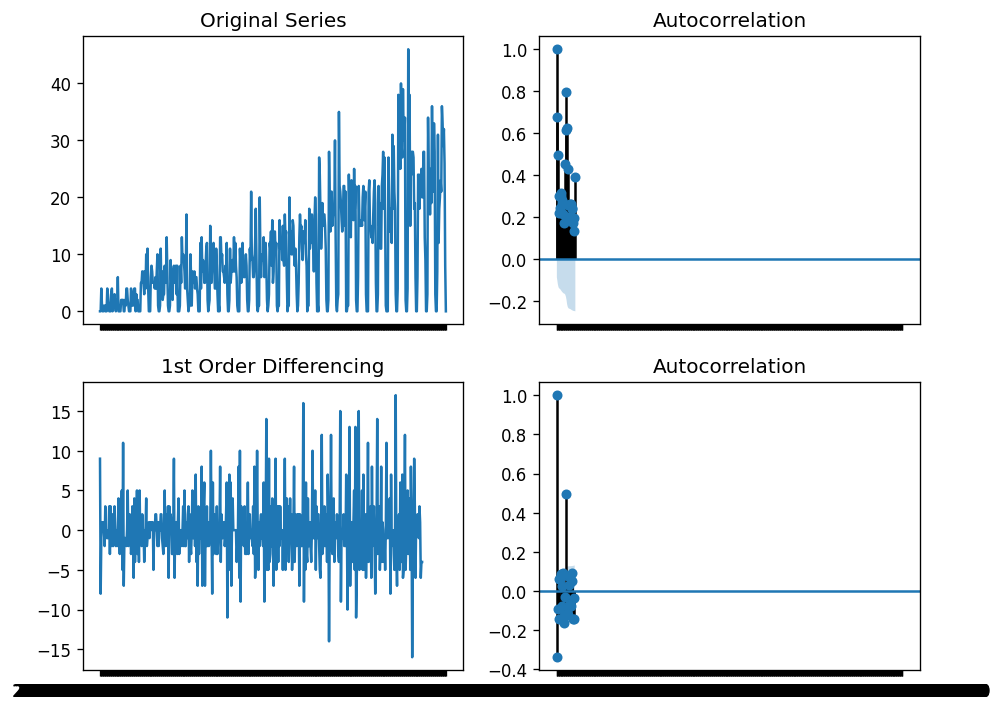

In [146]:
#поиск параметра d
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(super_abobus(65, 4)); axes[0, 0].set_title('Original Series')
sgt.plot_acf(super_abobus(65, 4), ax=axes[0, 1])
# n -st Differencing
#resulted['log_ord'] = np.log(resulted['orders_cnt'])
diff_abobus = np.diff(super_abobus(0, 4), n = 1)
axes[1, 0].plot(diff_abobus); axes[1, 0].set_title('1st Order Differencing')
sgt.plot_acf(diff_abobus, ax=axes[1, 1])

# 2nd Differencing
#axes[2, 0].plot(resulted.orders_cnt.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#sgt.plot_acf(resulted.orders_cnt.diff().diff().dropna(), ax=axes[2, 1])
# 2nd Differencing
#axes[2, 0].plot(resulted.orders_cnt.diff().diff()); axes[2, 0].set_title('n-nd Order Differencing')
#sgt.plot_acf(resulted.orders_cnt.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [147]:
#проверка гипотезы о стационарности ряда 2
ADFresultnew = adfuller(diff_abobus, autolag='AIC')
print(f'ADF Statistic: {ADFresultnew[0]}')
print(f'n_lags: {ADFresultnew[1]}')
print(f'p-value: {ADFresultnew[1]}')
for key, value in ADFresultnew[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -11.01018509268254
n_lags: 6.354241639959421e-20
p-value: 6.354241639959421e-20
Critial Values:
   1%, -3.4442214494657586
Critial Values:
   5%, -2.8676569002144148
Critial Values:
   10%, -2.5700280720682227


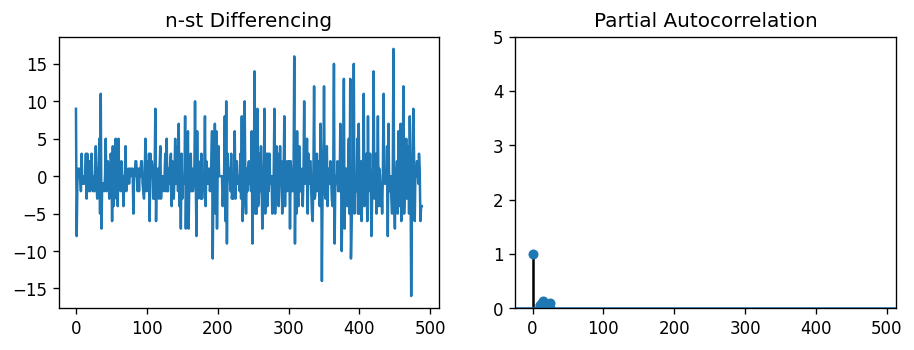

In [148]:
# устранение частичной автокорреляции при diff d-порядка, параметр p
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff_abobus); axes[0].set_title('n-st Differencing')
axes[1].set(ylim=(0,5))
sgt.plot_pacf(diff_abobus,ax=axes[1])

plt.show()

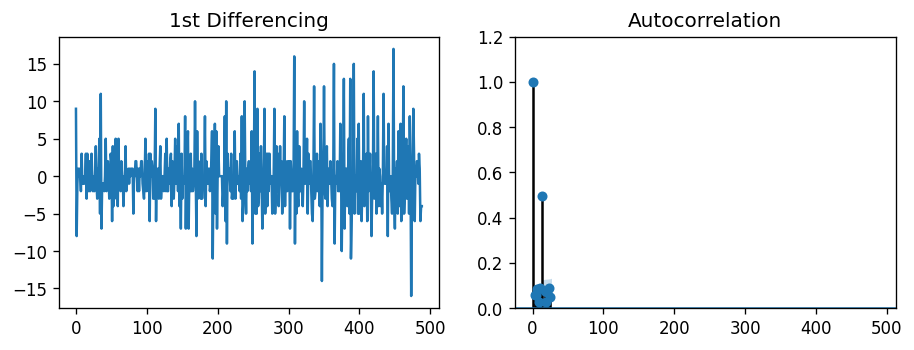

In [149]:
#ищем параметр q
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(diff_abobus); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
sgt.plot_acf(diff_abobus, ax=axes[1])

plt.show()

In [150]:
from statsmodels.tsa.arima.model import ARIMA

# строим ариму с параметрами (d, p, q)
model = ARIMA(diff_abobus, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  489
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1384.810
Date:                Thu, 13 Oct 2022   AIC                           2775.620
Time:                        14:33:53   BIC                           2788.191
Sample:                             0   HQIC                          2780.558
                                - 489                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3396      0.047     -7.164      0.000      -0.432      -0.247
ma.L1         -0.9999      3.522     -0.284      0.776      -7.902       5.903
sigma2        16.8354     59.566      0.283      0.7

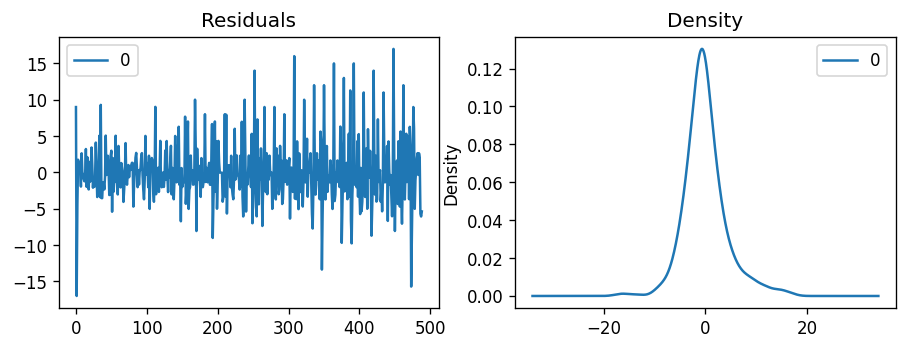

In [151]:
import numpy as np, pandas as pd  
from statsmodels.tsa.arima_model import ARIMA  
import matplotlib.pyplot as plt  
  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  

  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(model_fit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

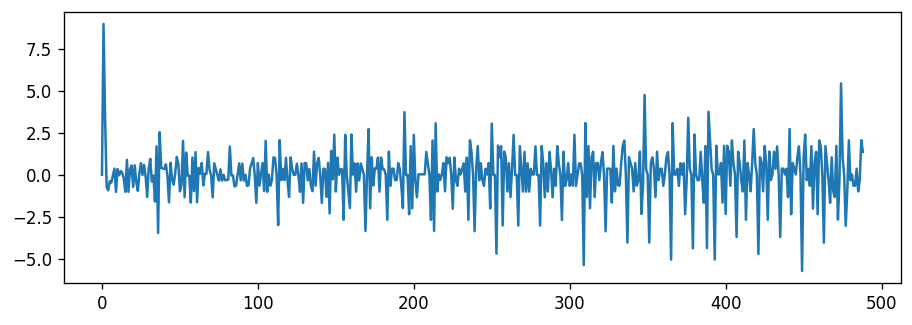

In [152]:
import numpy as np, pandas as pd  
from statsmodels.tsa.arima_model import ARIMA  
import matplotlib.pyplot as plt  
  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Actual vs Fitted  
array = model_fit.predict(dynamic = False)
for i in range(0,110):
  if(array[i] < 0):
    array[i] *= -1
arr = np.around(array,0)
plt.plot(model_fit.predict(dynamic = False))

In [153]:


answer = pd.DataFrame({'time': ['10:00:00', '11:00:00', '12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00', '20:00:00', '21:00:00','22:00:00'],
'Monday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0], 'Tuesday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0],'Wensday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0],
'Thursday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0], 'Friday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0],'Saturday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0],
'Sunday': [0, 0, 0,0, 0, 0,0, 0, 0,0, 0,0, 0]})
answer['Monday'] = pd.Series(arr[:13])
answer['Tuesday'] = pd.Series(arr[14:27])
answer['Wensday'] = pd.Series(arr[28:51])
answer['Thursday'] = pd.Series(arr[52:65])
answer['Friday'] = pd.Series(arr[66:79])
answer['Saturday'] = pd.Series(arr[80:93])
answer['Sunday'] = pd.Series(arr[94:107])
answer


,time,Monday,Tuesday,Wensday,Thursday,Friday,Saturday,Sunday
0,10:00:00,0.0,0.0,0.0,2.0,0.0,0.0,1.0
1,11:00:00,9.0,1.0,1.0,1.0,0.0,0.0,0.0
2,12:00:00,3.0,1.0,0.0,1.0,1.0,2.0,1.0
3,13:00:00,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,14:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15:00:00,0.0,1.0,0.0,2.0,1.0,1.0,2.0
6,16:00:00,0.0,1.0,2.0,1.0,1.0,1.0,1.0
7,17:00:00,0.0,1.0,2.0,1.0,0.0,0.0,1.0
8,18:00:00,0.0,0.0,3.0,1.0,0.0,1.0,0.0
9,19:00:00,1.0,1.0,3.0,2.0,0.0,0.0,1.0


In [154]:
from sklearn.linear_model import LinearRegression
#соответственно вместо чисел надо вписать столбец где соотношение(х) и дилей
x = np.array([result['ord/partn']]).reshape((-1, 1)) #reshape меняет форму данных просто
y = np.array([result['delay_rate']])
#model=LinearRegression(),fit_intercept=False- бета ноль не равно нулю(ну здесь по смысле модели думаю понятно,хотя можем и убрать вдруг что)
#model.fit(x,y)-подбор параметров
model = LinearRegression().fit(x, y)
#После совмещения модели нужно убедиться в удовлетворительности результатов для интерпретации, calculate R^2
r_sq = model.score(x, y)
print(r_sq)
#model содержит атрибуты .intercept_, который представляет собой коэффициент, и b₀ с .coef_, которые представляют b₁:
print(model.intercept_, model.coef_)
#стром предсказания по x
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
#можно еще вычислить короче для степенных функций со степенями от 0 до 1, потому что мы говорили о сетевых эффектах

KeyError: ignored

In [ ]:
result['ord/partn'] = result["orders_cnt"].divide(result["partners_cnt"])
result.head

In [ ]:
#идея заключается в построении линейной регрессии дилэй рэйта по отношению числа заказов к числу курьеров для выбранных наблюдений
from sklearn.linear_model import LinearRegression
#соответственно вместо чисел надо вписать столбец где соотношение закзов к курьерам(х) и дилей(y)

result_final = result.loc[result['partners_cnt'] != 0]
result_final['o_p'] = result_final['orders_cnt']/result_final['partners_cnt']
round(result_final['o_p'], 5)
x = result_final['o_p'].values.reshape((-1, 1)) #reshape меняет форму данных просто
y = result_final['delay_rate'].values
#model=LinearRegression()
#model.fit(x,y)-подбор параметров
model = LinearRegression().fit(x, y)
#После совмещения модели нужно убедиться в удовлетворительности результатов для интерпретации, calculate R^2
r_sq = model.score(x, y)
print(r_sq)
#model содержит атрибуты .intercept_, который представляет собой коэффициент, и b₀ с .coef_, которые представляют b₁:
print(model.intercept_, model.coef_)
#стром предсказания по x
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
#из полученной модели регрессии мы дергаем соотношение при дилей рэйт=5
#можно еще вычислить короче для степенных функций со степенями от 0 до 1, потому что мы говорили о сетевых эффектах(типо функция выпуклая вверх)
#можно, но только если будет хороший темп работы. Для этого мы преобразуем наблюдения х и берем нужную степень от них.

In [ ]:
#необходимо разделить датасет на отдельные 

for i in range(len(#датасет)):
  #разделяем данные на города
  a=
  for j in range():
    #разделяем 
